In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
dataset = pd.read_excel("~/Documents/Python/coffee_sales/Coffee Shop Sales.xlsx")

In [3]:
df=dataset.copy()

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
#Check for null values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
df['transaction_time'] = df['transaction_time'].astype('str')
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [9]:
df['sales'] = df['unit_price'] * df['transaction_qty']
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,0 days 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00
149112,149453,2023-06-30,0 days 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00
149113,149454,2023-06-30,0 days 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00
149114,149455,2023-06-30,0 days 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75


In [10]:
df['datetime'] = df['transaction_date'] + df['transaction_time']

In [11]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [12]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [13]:
df_location = df.groupby('store_location').agg({
    'sales':'sum',
    'transaction_qty':'count'
}).reset_index()

(array([19358, 19389, 19417, 19448, 19478, 19509, 19538]),
 [Text(19358, 0, 'Jan\n2023'),
  Text(19389, 0, 'Feb'),
  Text(19417, 0, 'Mar'),
  Text(19448, 0, 'Apr'),
  Text(19478, 0, 'May'),
  Text(19509, 0, 'Jun'),
  Text(19538, 0, '')])

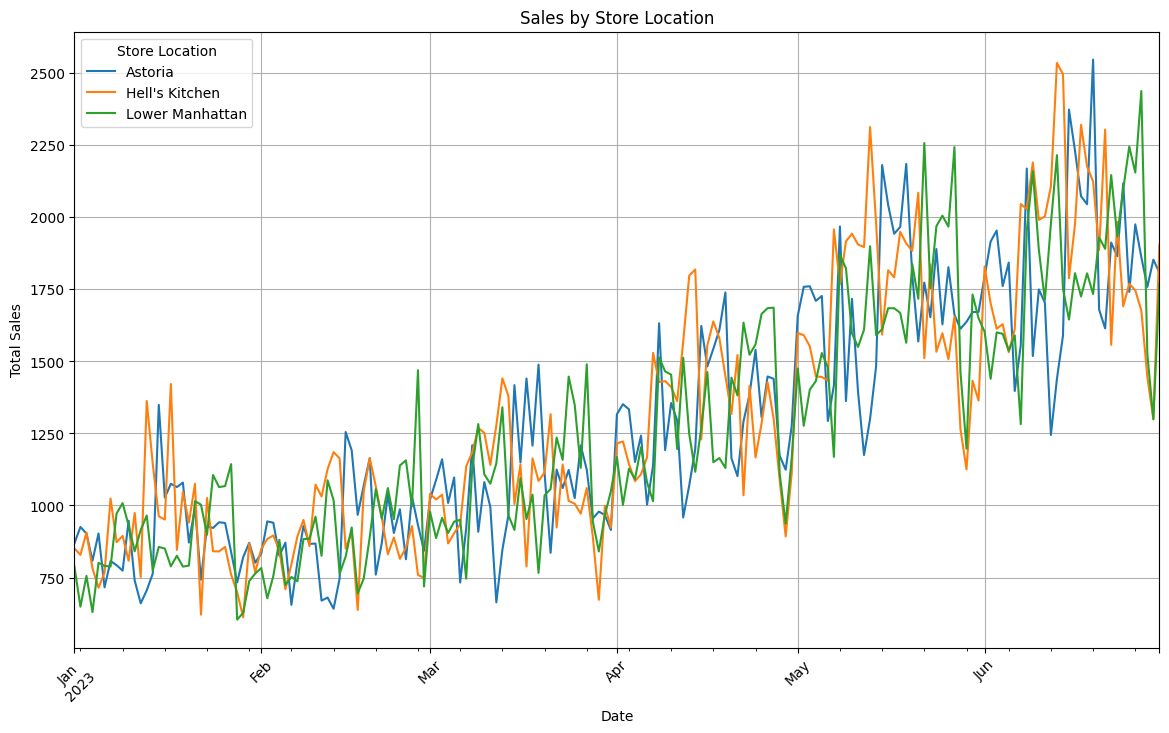

In [14]:
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['sales'].sum().unstack()

daily_sales_by_location.plot(figsize=(14,8))
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales by Store Location')
plt.legend(title = 'Store Location')
plt.grid(True)
plt.xticks(rotation = 45)

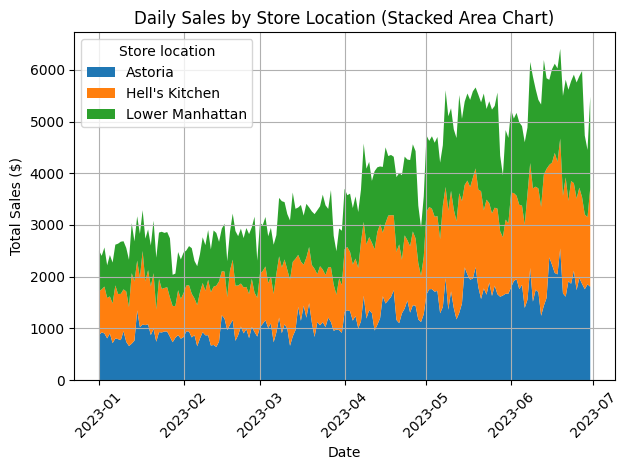

In [15]:
plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels = daily_sales_by_location.columns)

plt.title('Daily Sales by Store Location (Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend(title = 'Store location', loc = 'upper left')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()

In [16]:
#Time series analysis
daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

df['day_of_week'] = df['datetime'].dt.day_name()

weekly_sales = df.groupby('day_of_week')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

df['month'] = df['datetime'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

daily_sales, weekly_sales, monthly_sales

(    transaction_date    sales
 0         2023-01-01  2508.20
 1         2023-01-02  2403.35
 2         2023-01-03  2565.00
 3         2023-01-04  2220.10
 4         2023-01-05  2418.85
 ..               ...      ...
 176       2023-06-26  5875.90
 177       2023-06-27  5975.65
 178       2023-06-28  4728.90
 179       2023-06-29  4450.75
 180       2023-06-30  5481.32
 
 [181 rows x 2 columns],
   day_of_week      sales
 0      Monday  101677.28
 1     Tuesday   99455.94
 2   Wednesday  100313.54
 3    Thursday  100767.78
 4      Friday  101373.00
 5    Saturday   96894.48
 6      Sunday   98330.31,
      month      sales
 0  2023-01   81677.74
 1  2023-02   76145.19
 2  2023-03   98834.68
 3  2023-04  118941.08
 4  2023-05  156727.76
 5  2023-06  166485.88)

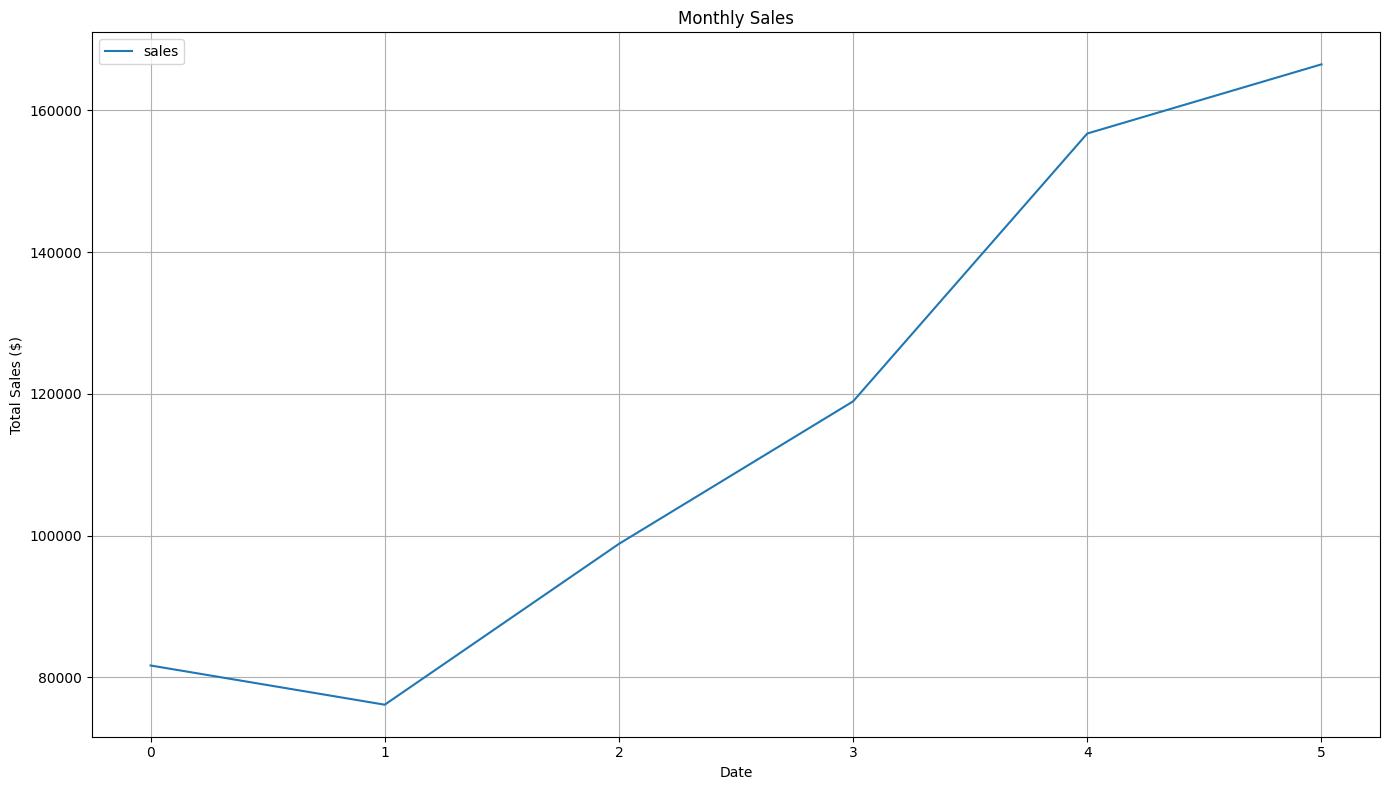

In [18]:
#line graph to visualise
monthly_sales.plot(figsize = (14,8))
plt.title("Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.tight_layout()

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


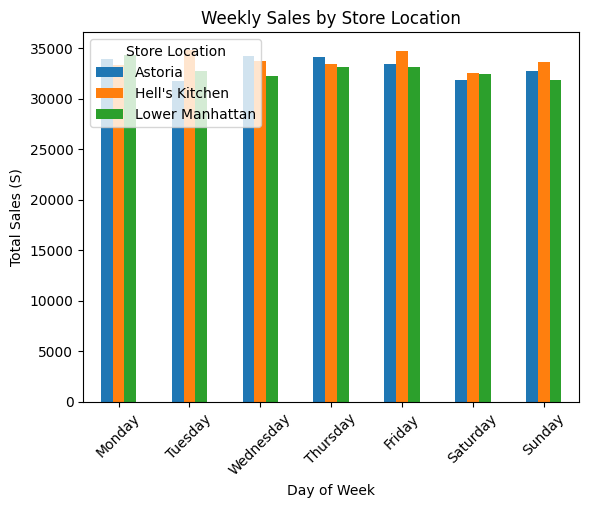

In [29]:
#Bar graph to show weekly sales
daily_sales2 = df.groupby(['day_of_week', 'store_location'])['sales'].sum().unstack()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_sales2 = daily_sales2.reindex(day_order)

display(daily_sales2)
daily_sales2[['Astoria', "Hell's Kitchen", 'Lower Manhattan']].plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel('Total Sales (S)')
plt.title("Weekly Sales by Store Location")
plt.xticks(rotation = 45)
plt.legend(title = 'Store Location', loc = 'upper left')

In [33]:
df_category = df.groupby('product_category').agg({
    'sales':'sum',
    'transaction_id':'count'
}).sort_values('sales', ascending = False)

df_category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
hour,,,,,,,,,
6,2677.95,406.0,7811.95,874.45,2770.50,430.4,614.45,258.52,6056.05
7,7948.44,1754.0,23579.90,3602.20,6507.25,985.6,1229.05,680.18,17239.85
8,10417.84,2098.0,30579.85,5444.75,8166.00,1224.8,1403.85,605.78,22759.00
9,10523.91,2035.0,31014.85,7353.25,7787.50,1176.0,2072.15,383.82,22823.05
10,10982.50,1745.0,33297.10,7608.70,8070.50,1532.8,1608.45,799.79,23028.55
11,5612.06,532.0,18188.15,3295.20,4853.75,427.2,457.95,248.88,12703.95
12,4180.44,470.0,16162.90,1384.15,4416.50,333.6,476.50,101.60,12667.10
13,4421.08,966.0,16620.95,1566.65,4415.00,339.2,458.55,260.12,11319.90
14,4740.46,428.0,16725.35,1573.95,4637.50,356.8,471.30,238.88,12132.50


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '6'),
  Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12'),
  Text(7, 0, '13'),
  Text(8, 0, '14'),
  Text(9, 0, '15'),
  Text(10, 0, '16'),
  Text(11, 0, '17'),
  Text(12, 0, '18'),
  Text(13, 0, '19'),
  Text(14, 0, '20')])

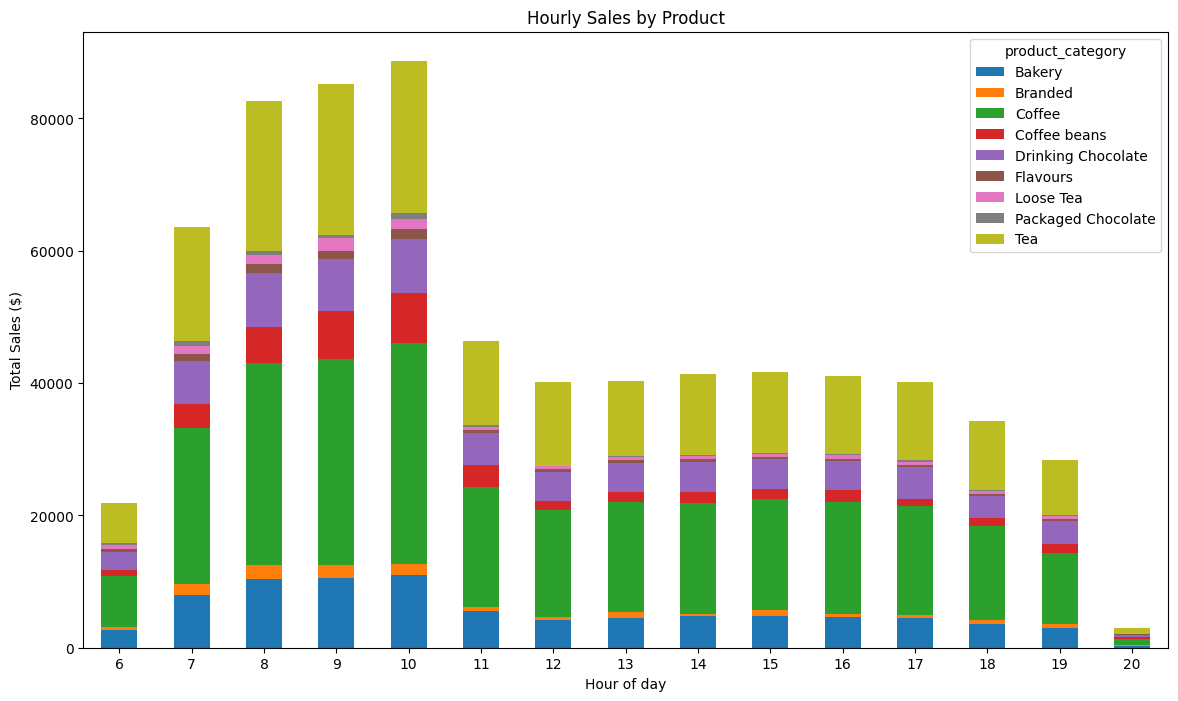

In [39]:
df['hour']=df['datetime'].dt.hour

hourly_sales_by_product = df.groupby(['hour', 'product_category'])['sales'].sum().unstack()

display(hourly_sales_by_product)

hourly_sales_by_product.plot(kind='bar', stacked=True, figsize=(14,8))

plt.xlabel('Hour of day')
plt.ylabel("Total Sales ($)")
plt.title("Hourly Sales by Product")
plt.xticks(rotation = 0)

In [41]:
#Average sales by transaction
df_category['avg sales'] = df_category['sales'] / df_category['transaction_id']
df_category

,sales,transaction_id,avg sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


In [43]:
sales_by_product = df.groupby('product_type').agg({
    'sales':'sum',
    'transaction_id':'count'
})

sales_by_product

,sales,transaction_id
product_type,,
Barista Espresso,91406.20,16403
Biscotti,19793.53,5711
Black tea,2711.85,303
Brewed Black tea,47932.00,11350
Brewed Chai tea,77081.95,17183
Brewed Green tea,23852.50,5671
Brewed herbal tea,47539.50,11245
Chai tea,4301.25,443
Clothing,6163.00,221


In [45]:
#Product sales by type
df_product_sales = df.groupby(['product_category', 'product_type'])['sales'].sum().reset_index()
df_product_sales

,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


In [ ]:
sns.barplot(data=df_product_sales, x='product_category', y='sales', hue='product_type')
plt.tight_layout()

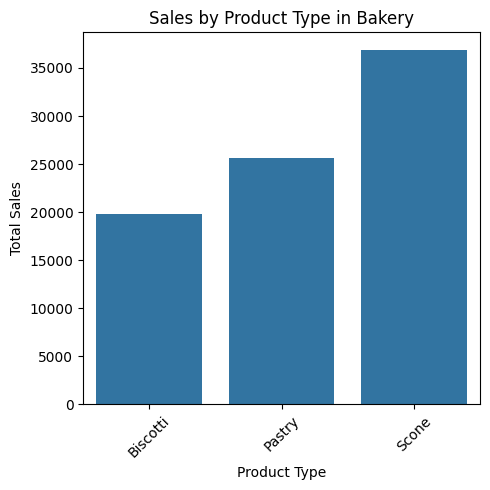

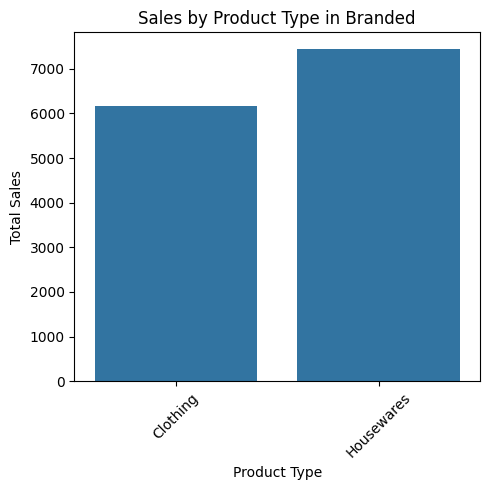

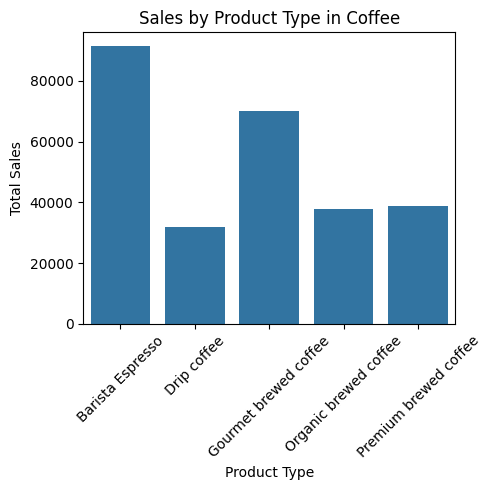

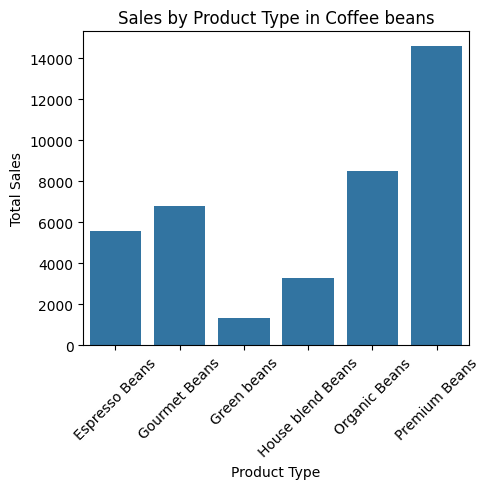

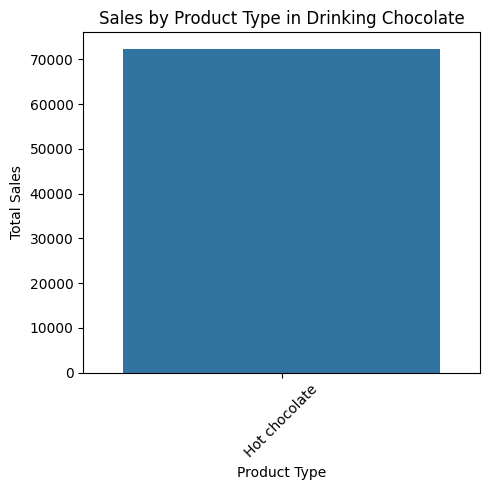

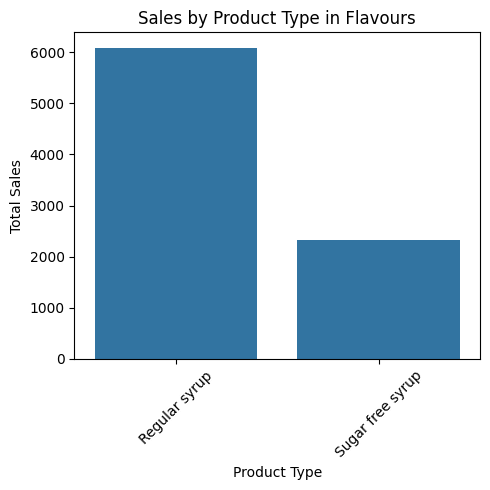

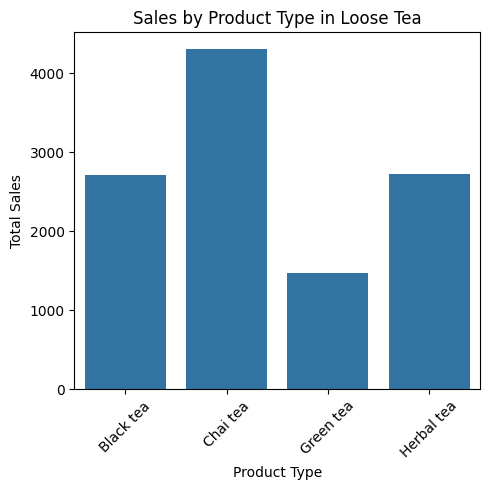

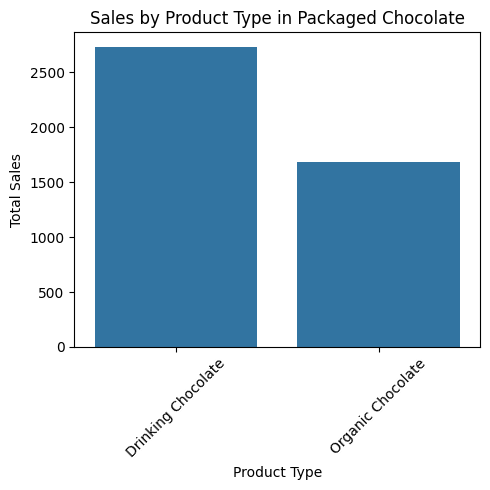

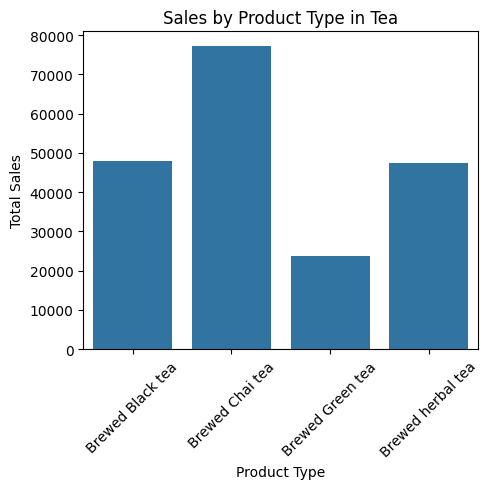

In [53]:
categories = df_product_sales['product_category'].unique()

for category in categories:
    plt.figure(figsize=(5,5))
    category_data = df_product_sales[df_product_sales['product_category'] == category]
    sns.barplot(data=category_data, x= 'product_type', y= 'sales')

    plt.title(f'Sales by Product Type in {category}')
    plt.xlabel('Product Type')
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [55]:
#Hourly sales by location
hourly_location = df.groupby(['store_location', 'hour'])['sales'].sum().reset_index()
hourly_location

,store_location,hour,sales
0,Astoria,7,19028.80
1,Astoria,8,22805.90
2,Astoria,9,23183.57
3,Astoria,10,24426.12
4,Astoria,11,15498.13
5,Astoria,12,15681.20
6,Astoria,13,15947.87
7,Astoria,14,15175.27
8,Astoria,15,15651.95
9,Astoria,16,16110.85


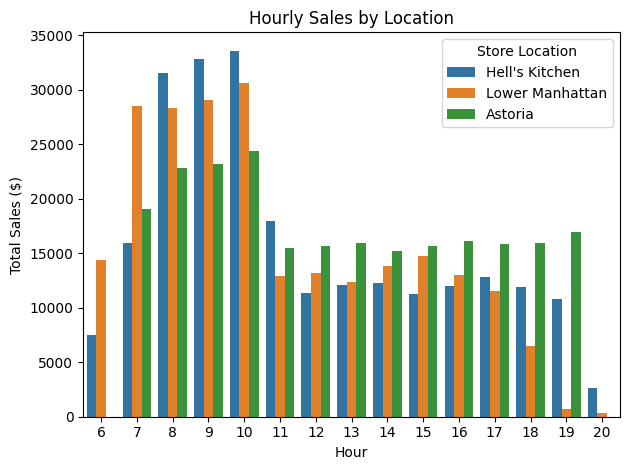

In [58]:
sns.barplot(data=hourly_location, x='hour', y='sales', hue='store_location')

plt.title("Hourly Sales by Location")
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.legend(title = 'Store Location', loc = 'upper right')

plt.tight_layout()
plt.show()